# Import Libraries
We use the Python SciPy Library to optimize our portfolio. (pip install scipy)

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
import datetime
from pylab import plt
import scipy.optimize as sco  #find the max return
plt.style.use('ggplot')

# Stock Relation Analysis

In [2]:
stock_data = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)
stock_data = pd.DataFrame(stock_data)
stock_data.head()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2018-02-19,644.4,474.05,2494.0,760.5,284.62
2018-02-20,647.6,475.00,2493.0,737.0,288.47
2018-02-21,639.0,472.20,2496.5,747.3,289.57
2018-02-22,637.8,473.90,2467.5,728.1,288.12
2018-02-23,650.4,476.10,2477.5,723.4,287.16


In [3]:
stock_return = stock_data.pct_change(periods=1)
stock_return.dropna(inplace = True)
stock_return.head()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2018-02-20,0.004966,0.002004,-0.000401,-0.030901,0.013527
2018-02-21,-0.013280,-0.005895,0.001404,0.013976,0.003813
2018-02-22,-0.001878,0.003600,-0.011616,-0.025692,-0.005007
2018-02-23,0.019755,0.004642,0.004053,-0.006455,-0.003332
2018-02-26,-0.000308,0.009977,0.003835,-0.002765,0.015531


In [4]:
stock_return.shape

(1261, 5)

In [5]:
asset_return = stock_return.mean()
asset_covariance = stock_return.cov()
asset_correlation = stock_return.corr()

In [6]:
num_asset= 5  # number of asset not necessary easy for further edit

In [7]:
asset_return * 250 # yearly return

BLND.L   -0.019490
BP.L      0.100881
DGE.L     0.098857
HSBA.L   -0.002918
RR.L     -0.016571
dtype: float64

In [8]:
asset_covariance * 252  # Cov Matrix

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
BLND.L,0.106981,0.045361,0.025800,0.038685,0.100273
BP.L,0.045361,0.131583,0.029641,0.051478,0.098341
DGE.L,0.025800,0.029641,0.053414,0.025175,0.047541
HSBA.L,0.038685,0.051478,0.025175,0.076894,0.073129
RR.L,0.100273,0.098341,0.047541,0.073129,0.343818


# Optimize Portfolio

Define Functions to calculate the Portfolio's Variance, Volatility, Return and the Sharpe Ratio.
We use numpy functions to perform our calculations.

In [9]:
def portfolio_variance(weights):
    weights = np.array(weights)
    var = weights.T @ (asset_covariance * 252) @ weights
    return var

def portfolio_volatility(weights):
    return np.sqrt(portfolio_variance(weights))

def portfolio_return(weights):
    return np.sum(asset_return * weights) * 252

def portfolio_sharpe_ratio(weights):
    return (portfolio_return(weights) - 0.03) / portfolio_volatility(weights)

In [10]:
min_return = min(asset_return * 252)
max_return = max(asset_return * 252)
expected_returns = np.linspace(min_return, max_return, 100)
expected_volatility = []
weights = []
sharpe = []
initialWeights = np.ones(num_asset)
bnds = [(0, 1) for _ in range(num_asset)]

for i, expected_return in enumerate(expected_returns):
    cons = (
        {'type': 'eq', 'fun': lambda x: portfolio_return(x) - expected_return},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )
    res = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=bnds, constraints=cons)
    frontierWeights = res['x']
    frontierRet = portfolio_return(frontierWeights)
    expected_volatility.append(res['fun'])
    weights.append(frontierWeights)
    sharpe.append((frontierRet - 0.03) / expected_volatility[-1])

# find the maximum return with a fixed volatility, risk-free rate at 0.03


# Plot To Show Sharpe Ratio

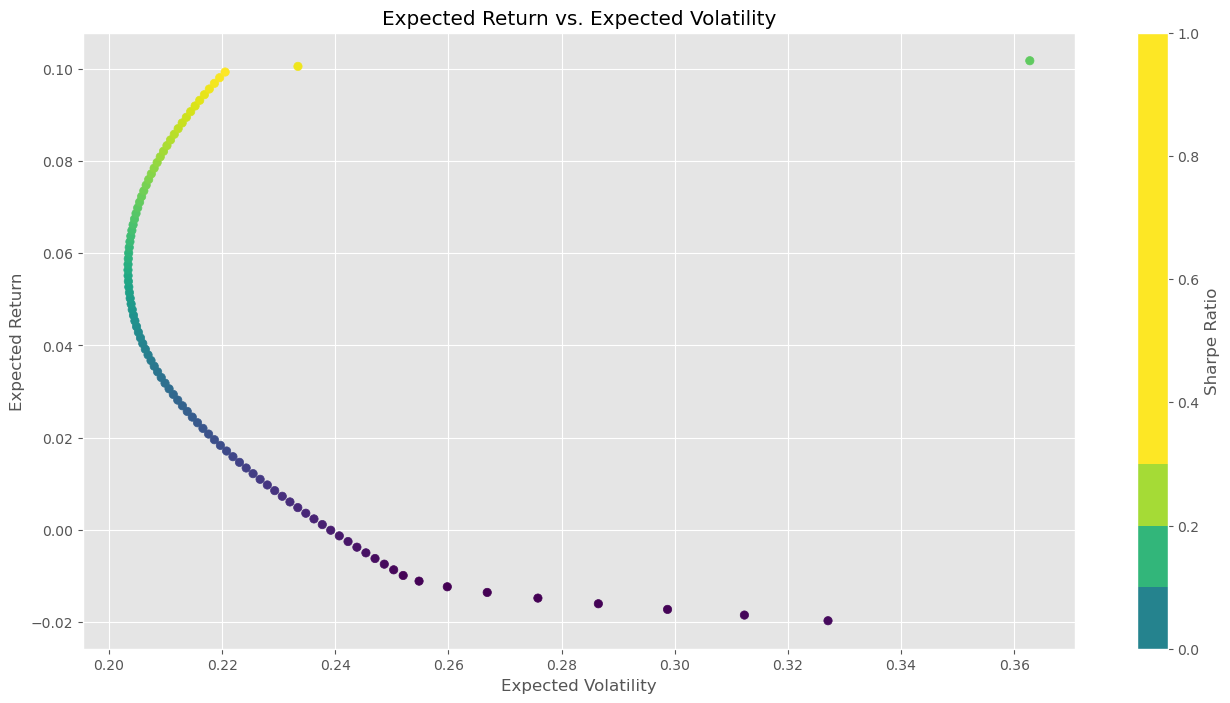

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(expected_volatility, expected_returns, c=(expected_returns - 0.03) / expected_volatility, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio', boundaries=np.linspace(0, 1, 11))
plt.title('Expected Return vs. Expected Volatility')
plt.show()


In [12]:
weights_end = pd.DataFrame(weights,columns=['BLND.L','BP.L','DGE.L','HSBA.L','RR.L'])
weights_end
# find the weights of every portfolio with highest return

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
0,1.000000e+00,2.405554e-15,0.000000e+00,1.028263e-12,8.802349e-13
1,9.266332e-01,0.000000e+00,2.775558e-17,7.336678e-02,5.551115e-17
2,8.532664e-01,1.110223e-16,0.000000e+00,1.467336e-01,1.110223e-16
3,7.798997e-01,6.938894e-18,0.000000e+00,2.201003e-01,6.938894e-17
4,7.065329e-01,0.000000e+00,5.551115e-17,2.934671e-01,0.000000e+00
...,...,...,...,...,...
95,0.000000e+00,1.800638e-01,7.884566e-01,3.147961e-02,0.000000e+00
96,5.289157e-18,1.849079e-01,7.954628e-01,1.962925e-02,0.000000e+00
97,0.000000e+00,1.897514e-01,8.024697e-01,7.778870e-03,0.000000e+00
98,3.922444e-16,3.993126e-01,6.006874e-01,0.000000e+00,2.442230e-16


In [13]:
exp_volatility_end = pd.DataFrame(expected_volatility,columns=['Volatility'])
exp_returns_end = pd.DataFrame(expected_returns,columns=['Return'])
sharpe_end = pd.DataFrame(sharpe,columns=['Sharpe'])

In [14]:
portfolio_end = pd.concat([weights_end,exp_volatility_end,exp_returns_end,sharpe_end],axis=1)
portfolio_end
# add volatility return and sharp into the portfolio

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L,Volatility,Return,Sharpe
0,1.000000e+00,2.405554e-15,0.000000e+00,1.028263e-12,8.802349e-13,0.327079,-0.019646,-0.151786
1,9.266332e-01,0.000000e+00,2.775558e-17,7.336678e-02,5.551115e-17,0.312302,-0.018421,-0.155044
2,8.532664e-01,1.110223e-16,0.000000e+00,1.467336e-01,1.110223e-16,0.298716,-0.017195,-0.157993
3,7.798997e-01,6.938894e-18,0.000000e+00,2.201003e-01,6.938894e-17,0.286490,-0.015969,-0.160457
4,7.065329e-01,0.000000e+00,5.551115e-17,2.934671e-01,0.000000e+00,0.275804,-0.014744,-0.162230
...,...,...,...,...,...,...,...,...
95,0.000000e+00,1.800638e-01,7.884566e-01,3.147961e-02,0.000000e+00,0.218627,0.096786,0.305478
96,5.289157e-18,1.849079e-01,7.954628e-01,1.962925e-02,0.000000e+00,0.219559,0.098011,0.309763
97,0.000000e+00,1.897514e-01,8.024697e-01,7.778870e-03,0.000000e+00,0.220526,0.099237,0.313962
98,3.922444e-16,3.993126e-01,6.006874e-01,0.000000e+00,2.442230e-16,0.233396,0.100462,0.301901


In [15]:
#Minimum Variance Portfolio
mvp = portfolio_end[portfolio_end['Volatility']==portfolio_end['Volatility'].min()] #MVP
mvp

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L,Volatility,Return,Sharpe
62,0.142381,0.037601,0.562696,0.257322,0.0,0.203356,0.056341,0.129531


In [16]:
portfolio_end['Sharpe'].max()
opt = portfolio_end[portfolio_end['Sharpe']==portfolio_end['Sharpe'].max()] #optimize portfolio max sharpe ratio
opt

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L,Volatility,Return,Sharpe
97,0.0,0.189751,0.80247,0.007779,0.0,0.220526,0.099237,0.313962


# Market Analysis
Import FTSE100 Market Data to use as Market Portfolio

In [17]:
ftse_100 = pd.read_csv('ftse_index.csv',index_col=0,parse_dates=True,usecols=['Date','Close']) #Use FTSE as market portfolio
ftse_100.tail()

,Close
Date,
2023-02-10,7882.5
2023-02-13,7947.6
2023-02-14,7953.9
2023-02-15,7997.8
2023-02-16,8012.5


In [18]:
ftse_100.describe()

,Close
count,1261.000000
mean,7060.732276
std,543.129568
min,4993.900000
25%,6885.300000
50%,7194.200000
75%,7445.700000
max,8012.500000


In [19]:
market_return = ftse_100.pct_change(periods=1)
market_return.dropna(inplace = True)
market_return.head()

,Close
Date,
2018-02-20,-0.000124
2018-02-21,0.004802
2018-02-22,-0.004010
2018-02-23,-0.001103
2018-02-26,0.006239


In [20]:
market_return.describe()

,Close
count,1260.000000
mean,0.000143
std,0.011186
min,-0.108738
25%,-0.004642
50%,0.000659
75%,0.005522
max,0.090530


In [21]:
market_return_mean = market_return.mean()
market_return_mean * 250 # yearly return

Close    0.035648
dtype: float64

In [22]:
market_beta = (market_return_mean * 250 - 0.03)/market_return.std()
market_beta
# market beta

Close    0.504883
dtype: float64

In [23]:
stock_beta = (stock_return.mean()*250 - 0.03)/stock_return.std()
stock_beta_end = pd.DataFrame(stock_beta,columns=['Beta'])
stock_beta_end

# Calculating stock beta and creating a new Dataframe

,Beta
BLND.L,-2.401968
BP.L,3.101913
DGE.L,4.729554
HSBA.L,-1.884453
RR.L,-1.260814


In [24]:
assert_return_end = pd.DataFrame(asset_return * 250, columns = ['Return'])
assert_end = pd.concat([stock_beta_end,assert_return_end],axis=1)
assert_end

,Beta,Return
BLND.L,-2.401968,-0.019490
BP.L,3.101913,0.100881
DGE.L,4.729554,0.098857
HSBA.L,-1.884453,-0.002918
RR.L,-1.260814,-0.016571


# Security Market Line (SML) & Minimum Variance Portfolio

In [25]:
sml_slope=market_return_mean * 250/market_beta

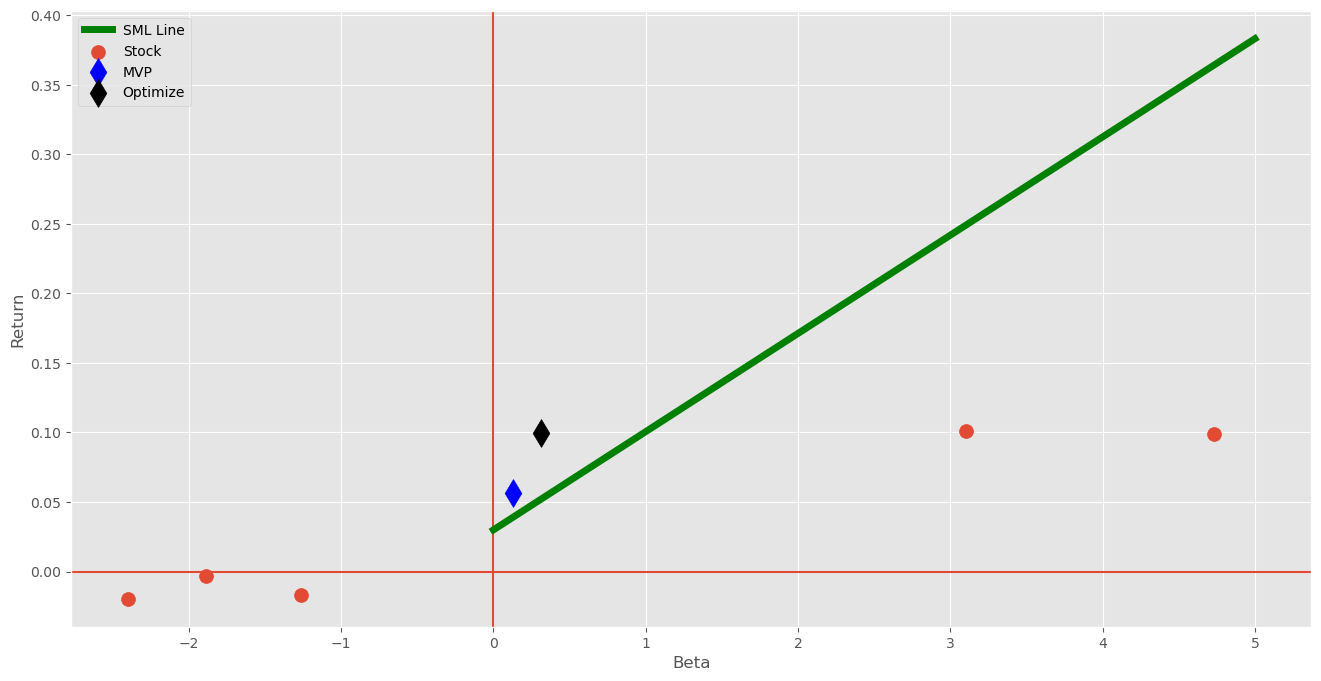

In [26]:
plt.figure(figsize=(16,8))
plt.axvline(0)
plt.axhline(0)
x1 = np.linspace(0, 5, 256)
y1 = 0.03+x1 * float(sml_slope)
plt.plot(x1,y1,color='g',linewidth=5,label='SML Line')
plt.scatter(assert_end['Beta'],assert_end['Return'],marker='o',s=100,label='Stock')
plt.scatter(0.130758,0.056586,color='b',marker='d',s=200,label='MVP')
plt.scatter(0.315409,0.09962,color='k',marker='d',s=200,label='Optimize')
plt.grid(True)
plt.xlabel('Beta')
plt.ylabel('Return')
plt.legend()
plt.show()

# SML any individual stock performance is lower than the market performance but the
# MVP and Optimize portfolio are quite good

In [27]:
mvp_price = float(mvp['BLND.L'])/644.4*stock_data['BLND.L'] + float(mvp['BP.L'])/474.05 * stock_data['BP.L']+\
float(mvp['DGE.L'])/2494 * stock_data['DGE.L'] + float(mvp['HSBA.L'])/760.5 * stock_data['HSBA.L']+\
float(mvp['RR.L'])/284.62 * stock_data['RR.L']
mvp_price = pd.DataFrame(mvp_price,columns=['MVP_Price'])
mvp_price

,MVP_Price
Date,
2018-02-19,1.000000
2018-02-20,0.992605
2018-02-21,0.994758
2018-02-22,0.981588
2018-02-23,0.985212
...,...
2023-02-10,1.137094
2023-02-13,1.149952
2023-02-14,1.143657


In [28]:
mvp_ret = float(mvp['BLND.L']) * stock_return['BLND.L']+\
float(mvp['BP.L']) * stock_return['BP.L'] + float(mvp['DGE.L']) * stock_return['DGE.L']+\
float(mvp['HSBA.L']) * stock_return['HSBA.L']+float(mvp['RR.L']) * stock_return['RR.L']
mvp_ret = pd.DataFrame(mvp_ret,columns=['MVP Return'])
mvp_ret

,MVP Return
Date,
2018-02-20,-0.007395
2018-02-21,0.002274
2018-02-22,-0.013280
2018-02-23,0.003607
2018-02-26,0.001778
...,...
2023-02-10,-0.006023
2023-02-13,0.010090
2023-02-14,-0.005968


# Minimum Variance Portfolio vs Bollinger Bands Trading Strategy

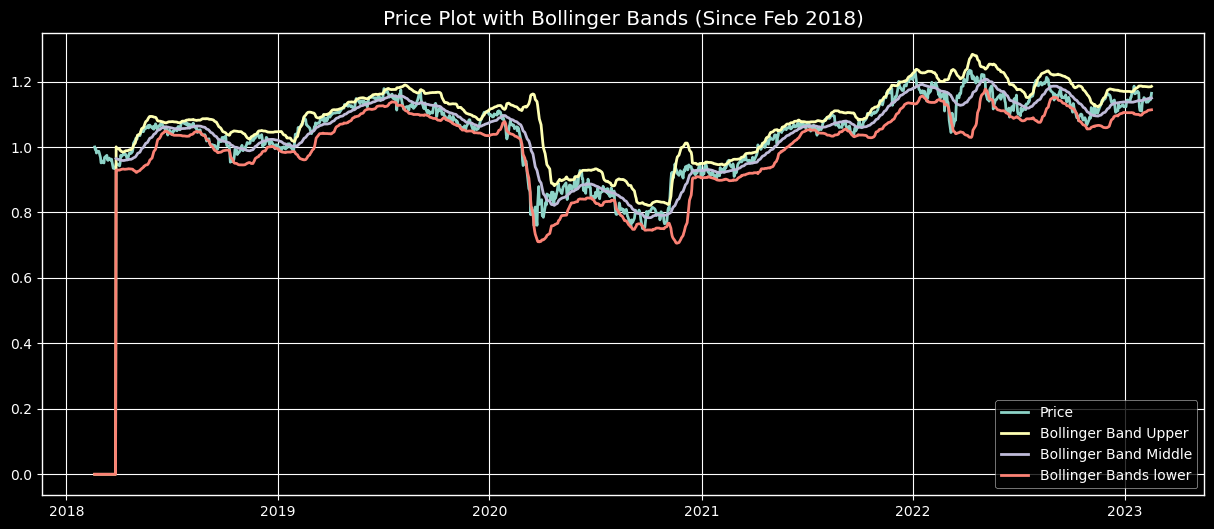

In [29]:
plt.style.use('dark_background')
mvp_df = mvp_price['2018-02-19':].copy()
window = 28; no_of_std = 2
rollingMean = mvp_df.MVP_Price.rolling(window).mean(); rollingStd = mvp_df.MVP_Price.rolling(window).std()
mvp_df['bbUp'] = (rollingMean + (rollingStd* no_of_std)).fillna(0.0)
mvp_df['bbMiddle'] =  mvp_df['MVP_Price'].rolling(window).mean()
mvp_df['bbLow'] = (rollingMean - (rollingStd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(mvp_df['MVP_Price'], lw=2.); plt.plot(mvp_df['bbUp'], lw=2.)
plt.plot(mvp_df['bbMiddle'], lw=2. ); plt.plot(mvp_df['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Bands lower"])
plt.title("Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()

C:\Users\ahith\AppData\Local\Temp\ipykernel_17912\39824163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_df['bbTradePosition'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_17912\39824163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_df['bbTradePosition'].iloc[row] = 1


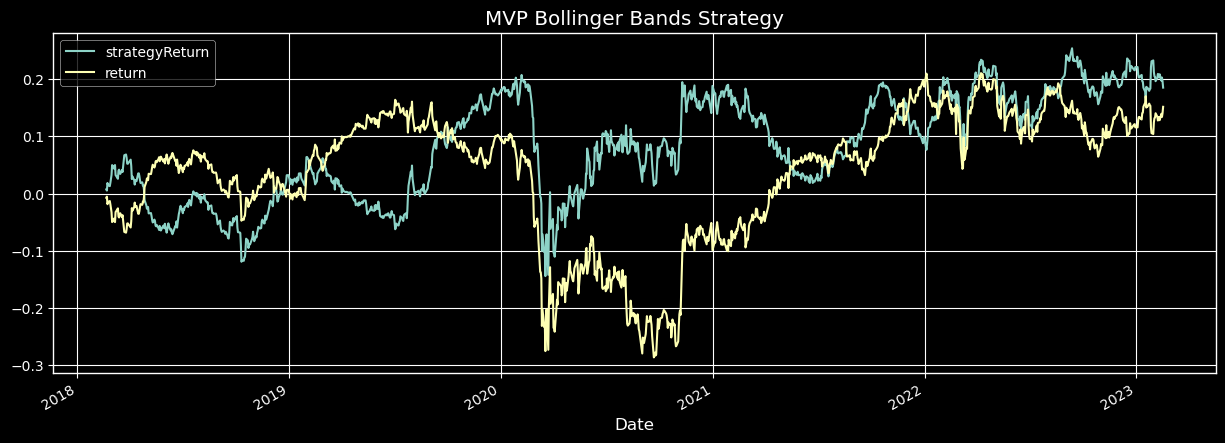

In [30]:
mvp_df['bbTradePosition'] = None
for row in range(len(mvp_df)):
  if (mvp_df['MVP_Price'].iloc[row] > mvp_df['bbUp'].iloc[row]) and (mvp_df['MVP_Price'].iloc[row-1] < mvp_df['bbUp'].iloc[row-1]):
    mvp_df['bbTradePosition'].iloc[row] = -1
  if (mvp_df['MVP_Price'].iloc[row] < mvp_df['bbLow'].iloc[row]) and (mvp_df['MVP_Price'].iloc[row-1] > mvp_df['bbLow'].iloc[row-1]):
    mvp_df['bbTradePosition'].iloc[row] = 1
mvp_df['bbTradePosition'].fillna(method='ffill',inplace=True)
mvp_df['return'] = np.log(mvp_df['MVP_Price'] / mvp_df['MVP_Price'].shift(1))
mvp_df['strategyReturn'] = mvp_df['return'] * mvp_df['bbTradePosition'].shift(1)
mvp_df[['strategyReturn','return']].cumsum().plot(figsize=(15,5))
plt.title('MVP Bollinger Bands Strategy')
plt.show()

In [31]:
opt_price = float(opt['BLND.L'])/644.4 * stock_data['BLND.L']+float(opt['BP.L'])/474.05 * stock_data['BP.L']+\
float(opt['DGE.L'])/2494 * stock_data['DGE.L']+float(opt['HSBA.L'])/760.5 * stock_data['HSBA.L']+\
float(opt['RR.L'])/284.62 * stock_data['RR.L']
opt_price = pd.DataFrame(opt_price,columns=['opt_Price'])
opt_price

,opt_Price
Date,
2018-02-19,1.000000
2018-02-20,0.999818
2018-02-21,0.999929
2018-02-22,0.991082
2018-02-23,0.995132
...,...
2023-02-10,1.352217
2023-02-13,1.367618
2023-02-14,1.363022


In [32]:
opt_ret = float(opt['BLND.L']) * stock_return['BLND.L']+\
float(opt['BP.L']) * stock_return['BP.L'] + float(opt['DGE.L']) * stock_return['DGE.L']+\
float(opt['HSBA.L']) * stock_return['HSBA.L'] + float(opt['RR.L']) * stock_return['RR.L']
opt_ret = pd.DataFrame(opt_ret,columns=['opt_Return'])
opt_ret

,opt_Return
Date,
2018-02-20,-0.000182
2018-02-21,0.000117
2018-02-22,-0.008838
2018-02-23,0.004083
2018-02-26,0.004949
...,...
2023-02-10,0.000330
2023-02-13,0.010897
2023-02-14,-0.003108


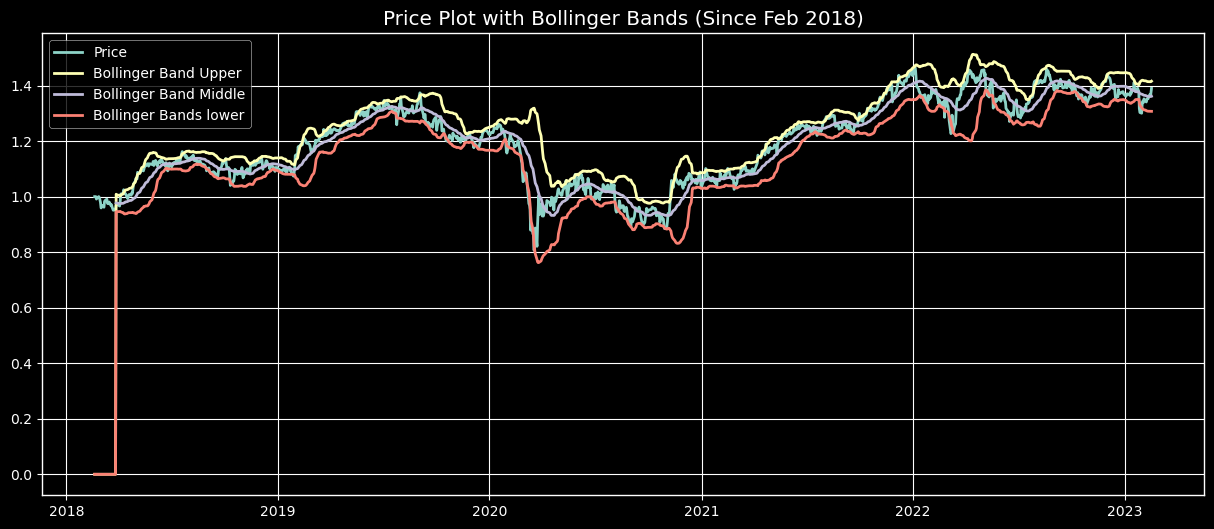

In [33]:
plt.style.use('dark_background')
opt_df = opt_price['2018-02-19':].copy()
window = 28; no_of_std = 2
rollingMean = opt_df.opt_Price.rolling(window).mean(); rollingStd = opt_df.opt_Price.rolling(window).std()
opt_df['bbUp'] = (rollingMean + (rollingStd* no_of_std)).fillna(0.0)
opt_df['bbMiddle'] =  opt_df['opt_Price'].rolling(window).mean()
opt_df['bbLow'] = (rollingMean - (rollingStd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(opt_df['opt_Price'], lw=2.); plt.plot(opt_df['bbUp'], lw=2.)
plt.plot(opt_df['bbMiddle'], lw=2. ); plt.plot(opt_df['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Bands lower"])
plt.title("Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()

C:\Users\ahith\AppData\Local\Temp\ipykernel_17912\2735148765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_df['bbTradePosition'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_17912\2735148765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_df['bbTradePosition'].iloc[row] = 1


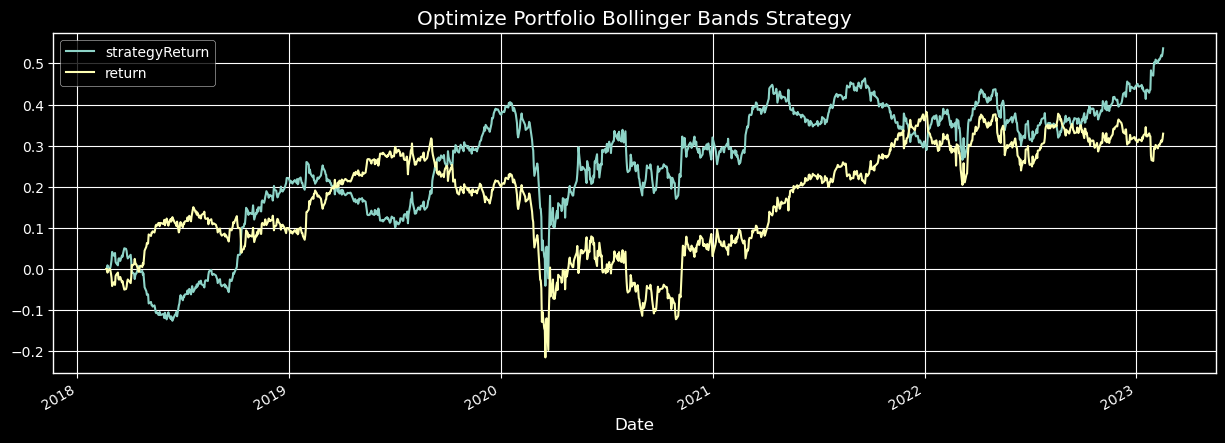

In [34]:
opt_df['bbTradePosition'] = None
for row in range(len(mvp_df)):
  if (opt_df['opt_Price'].iloc[row] > opt_df['bbUp'].iloc[row]) and (opt_df['opt_Price'].iloc[row-1] < opt_df['bbUp'].iloc[row-1]):
    opt_df['bbTradePosition'].iloc[row] = -1
  if (opt_df['opt_Price'].iloc[row] < opt_df['bbLow'].iloc[row]) and (opt_df['opt_Price'].iloc[row-1] > opt_df['bbLow'].iloc[row-1]):
    opt_df['bbTradePosition'].iloc[row] = 1
opt_df['bbTradePosition'].fillna(method='ffill',inplace=True)
opt_df['return'] = np.log(opt_df['opt_Price'] / opt_df['opt_Price'].shift(1))
opt_df['strategyReturn'] = opt_df['return'] * opt_df['bbTradePosition'].shift(1)
opt_df[['strategyReturn','return']].cumsum().plot(figsize=(15,5))
plt.title('Optimize Portfolio Bollinger Bands Strategy')
plt.show()